In [36]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [37]:
df = pd.read_csv("asd_all_ML.csv").drop("Unnamed: 0", axis=1)
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age',
       'Sex', 'Jaundice', 'Family_ASD', 'Class', 'asian', 'black', 'hispanic',
       'latino', 'middle eastern', 'others', 'south asians', 'white'],
      dtype='object')

# ML with just Jaundice as predictor of Class

In [38]:
X = pd.DataFrame(df['Jaundice'])
Y = df['Class']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

In [39]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [40]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

results = []
names = []

# evaluate each model in turn
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

LR: 0.600443 (0.040571)
LDA: 0.595074 (0.034905)
KNN: 0.508407 (0.101850)
CART: 0.600443 (0.040571)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/m

RF: 0.600443 (0.040571)
NB: 0.595074 (0.038072)
SVM: 0.600443 (0.040571)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anacon

Logistic Regression was had a sqaured value of .6

# ML with all predictors 

In [91]:
X = df.drop("Class", axis=1)
Y = df['Class']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

In [92]:
seed = 7
scoring = 'accuracy'

results = []
names = []

# evaluate each model in turn
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

LR: 0.990662 (0.006797)
LDA: 0.965320 (0.013906)
KNN: 0.893919 (0.013568)
CART: 0.929289 (0.016100)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/m

RF: 0.937280 (0.023554)
NB: 0.918609 (0.027628)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anacon

SVM: 0.951978 (0.014523)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anacon

Logistic Regression had r-squared value of .99

RF had rsquared of .95

### Random Forest with hyperparameter tuning 

In [93]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(X_train, Y_train)
    result = accuracy_score(Y_validation, forest.predict(X_validation))
    results.append(result) 
    print(n, ':', result)

1 : 0.8933333333333333
4 : 0.9093333333333333
5 : 0.904
8 : 0.9146666666666666
10 : 0.92
20 : 0.936
50 : 0.952
75 : 0.9546666666666667
100 : 0.9546666666666667
250 : 0.96
500 : 0.9626666666666667


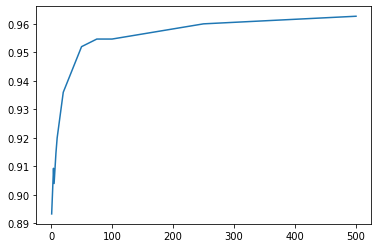

In [94]:
plt.plot(n_estimators_array, results)

In [95]:
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [96]:
rf = RandomForestClassifier(n_estimators=500)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X_train, Y_train)

/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.8s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 ......

[CV]  min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.6s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=30, total=   0.8s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=30, total=   0.8s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 ......

[CV]  min_samples_leaf=4, max_features=auto, max_depth=50, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=50 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=50, total=   0.6s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   0.8s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   0.8s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   0.8s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=50, total=   0.8s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=50, total=   0.8s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 ......

[CV]  min_samples_leaf=1, max_features=None, max_depth=70, total=   0.8s
[CV] min_samples_leaf=1, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=70, total=   0.8s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.8s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.8s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.8s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=70, total=   0.7s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=70, total=   0.7s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 ......

[CV]  min_samples_leaf=2, max_features=None, max_depth=90, total=   0.8s
[CV] min_samples_leaf=2, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=90, total=   0.8s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.7s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.7s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.7s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 .............
[CV]  min_samples_leaf=1, max_features=log2, max_depth=90, total=   0.6s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 .............
[CV]  min_samples_leaf=1, max_features=log2, max_depth=90, total=   0.6s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 ......

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  2.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=500,
                                                    n_jobs=None,
 

In [ ]:
rf_random.best_params_

In [ ]:
forest = RandomForestClassifier(n_estimators=20, min_samples_leaf=2, max_features='auto', max_depth=50)
forest.fit(X_train, Y_train)

In [ ]:
forestPredictions = forest.predict(X_validation)
print(confusion_matrix(Y_validation, forestPredictions))
print(classification_report(Y_validation, forestPredictions))

In [ ]:
feature_importances = pd.Series(forest.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)
feature_importances.plot(kind='barh', figsize=(7,6))

# Machine Learning with best fit model predictors taken from stepwise regregression

In [81]:
X = df.drop(['Family_ASD', 'Class', 'black', 'hispanic',
       'latino', 'middle eastern', 'others', 'white', 'Age', 'Jaundice'], axis=1)
Y = df['Class']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

In [82]:
seed = 7
scoring = 'accuracy'

results = []
names = []

# evaluate each model in turn
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

LR: 0.999333 (0.002000)
LDA: 0.971320 (0.014306)
KNN: 0.937964 (0.013327)
CART: 0.951298 (0.013691)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/m

RF: 0.956631 (0.012765)
NB: 0.947960 (0.022286)


/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/markzepeda/opt/anacon

SVM: 1.000000 (0.000000)


### Random Forest with hyperparameter tuning 

In [83]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(X_train, Y_train)
    result = accuracy_score(Y_validation, forest.predict(X_validation))
    results.append(result) 
    print(n, ':', result)

1 : 0.9173333333333333
4 : 0.936
5 : 0.936
8 : 0.936
10 : 0.9493333333333334
20 : 0.9546666666666667
50 : 0.9546666666666667
75 : 0.952
100 : 0.9466666666666667
250 : 0.9493333333333334
500 : 0.944


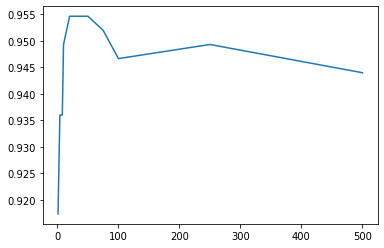

In [84]:
plt.plot(n_estimators_array, results)

In [85]:
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [86]:
rf = RandomForestClassifier(n_estimators=500)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X_train, Y_train)

/Users/markzepeda/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.7s
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.7s
[CV] min_samples_leaf=1, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.7s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.9s
[CV] min_samples_leaf=2, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.8s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] min_samples_leaf=4, max_features=auto, max_depth=10 ......

[CV]  min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.9s
[CV] min_samples_leaf=2, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.8s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.8s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.8s
[CV] min_samples_leaf=4, max_features=auto, max_depth=30 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.8s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=30, total=   0.8s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=30, total=   1.0s
[CV] min_samples_leaf=1, max_features=None, max_depth=30 ......

[CV]  min_samples_leaf=4, max_features=auto, max_depth=50, total=   0.8s
[CV] min_samples_leaf=4, max_features=auto, max_depth=50 .............
[CV]  min_samples_leaf=4, max_features=auto, max_depth=50, total=   0.8s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   0.9s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   1.0s
[CV] min_samples_leaf=1, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=50, total=   0.9s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=50, total=   0.9s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=50, total=   0.9s
[CV] min_samples_leaf=2, max_features=None, max_depth=50 ......

[CV]  min_samples_leaf=1, max_features=None, max_depth=70, total=   1.0s
[CV] min_samples_leaf=1, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=1, max_features=None, max_depth=70, total=   1.0s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.9s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.9s
[CV] min_samples_leaf=2, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=70, total=   0.9s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=70, total=   0.9s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=70, total=   0.8s
[CV] min_samples_leaf=4, max_features=None, max_depth=70 ......

[CV]  min_samples_leaf=2, max_features=None, max_depth=90, total=   0.9s
[CV] min_samples_leaf=2, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=2, max_features=None, max_depth=90, total=   0.9s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.8s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.8s
[CV] min_samples_leaf=4, max_features=None, max_depth=90 .............
[CV]  min_samples_leaf=4, max_features=None, max_depth=90, total=   0.8s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 .............
[CV]  min_samples_leaf=1, max_features=log2, max_depth=90, total=   0.7s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 .............
[CV]  min_samples_leaf=1, max_features=log2, max_depth=90, total=   0.7s
[CV] min_samples_leaf=1, max_features=log2, max_depth=90 ......

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  3.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=500,
                                                    n_jobs=None,
 

In [97]:
rf_random.best_params_

{'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30}

In [98]:
forest = RandomForestClassifier(n_estimators=20, min_samples_leaf=2, max_features='auto', max_depth=50)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
forestPredictions = forest.predict(X_validation)
print(confusion_matrix(Y_validation, forestPredictions))
print(classification_report(Y_validation, forestPredictions))

[[224   8]
 [ 10 133]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       232
           1       0.94      0.93      0.94       143

    accuracy                           0.95       375
   macro avg       0.95      0.95      0.95       375
weighted avg       0.95      0.95      0.95       375



A9                0.174162
A6                0.160495
A4                0.144871
A5                0.092737
A3                0.079519
A1                0.067240
A7                0.062315
A10               0.052314
Age               0.042016
A8                0.040611
A2                0.029554
Sex               0.009628
white             0.008575
middle eastern    0.008380
Jaundice          0.006710
asian             0.006227
Family_ASD        0.004763
latino            0.003284
black             0.002320
south asians      0.001882
others            0.001251
hispanic          0.001144
dtype: float64


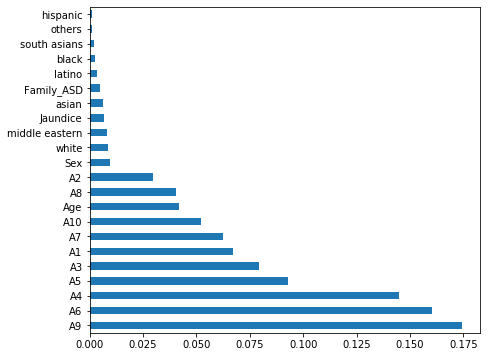

In [100]:
feature_importances = pd.Series(forest.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)
feature_importances.plot(kind='barh', figsize=(7,6))